# **ANOVA, a regresja liniowa**

# **Biblioteki**

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sa
import scikit_posthocs as sp
from scipy.stats import shapiro, normaltest, chisquare, jarque_bera, kstest
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns


# **Przygotowanie danych**

Średnia energia piosenek znajdujących się na liście przebojów w latach 2013-2015:

In [2]:
Energia_2013 = "56 88 87 68 86 81 80 84 66 78 78 94 78 76 70 81 88 67 74 78 68 81 92 75 91 82 83 70 78 93 82 73 88 75 79 84 87 62 74 76 68 78 93 102 92 81 70 79 77 96 84"
Energia_2013 = [int(value) for value in Energia_2013.split(" ")]


Energia_2014 =  "54 62 71 73 78 81 82 72 64 73 58 65 81 92 54 69 72 71 66 93 80 73 78 68 94 89 75 92 67 72 86 92 74 82 62 60 50 59 81 54 66 62 76 49 58 82 80 95 79 78 77"
Energia_2014 = [int(value) for value in Energia_2014.split(" ")]


Energia_2015 =  Energia_2015 =  "68 71 82 68 74 75 92 94 68 86 80 79 72 79 87 85 96 72 84 85 86 92 84 80 59 70 84 68 64 66 93 80 73 78 68 94 89 75 92 67 72 86 92 74 82 62 60 50 59 81 54"
Energia_2015 = [int(value) for value in Energia_2015.split(" ")]


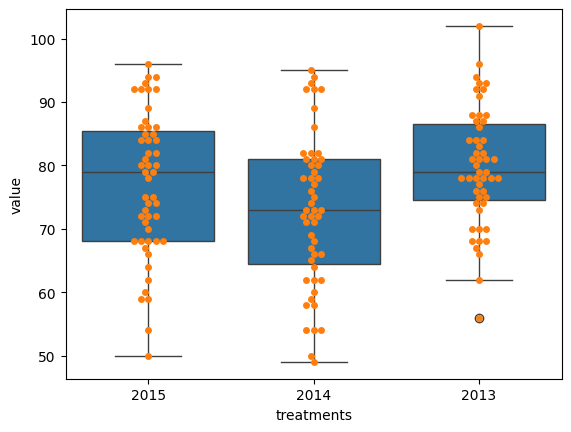

In [3]:
x1 = np.array(Energia_2013)
x2 = np.array(Energia_2014)
x3 = np.array(Energia_2015)
x = [x3, x2, x1]
x = np.transpose(x)

df = pd.DataFrame(x)
df.columns =['2015','2014','2013']
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['2015', '2014', '2013'])
df_melt.columns = ['index', 'treatments', 'value']

# Wizualizacja
ax = sns.boxplot(x='treatments', y='value', data=df_melt)
ax = sns.swarmplot(x="treatments", y="value", data=df_melt)
plt.show()

# **ANOVA**

**Zadanie:**

Proszę sprawdzić, na poziomie istotności 0.05, czy średnia energia piosenek znajdujących się na liście przebojów w latach 2013-2015 jest taka sama.

Proszę pamiętać o wszystkich założeniach, hipotezach oraz testach POST-HOC.

**Do zbadania normalności rozkładów prosze wykorzystać test Shapiro-Wilka:**

stat, p =shapiro(data)

print('Shapiro-Wilk Test: stat=%.3f, p=%3f' %(stat,p))

if p>0.05: print('normal\n')

else: print('not normal\n')

In [8]:
# Rozwiązanie
df.head()

,2015,2014,2013
0,68,54,56
1,71,62,88
2,82,71,87
3,68,73,68
4,74,78,86


In [10]:

df1 = pd.melt(df, value_vars=['2013',	'2014',	'2015'])
df1 = df1.rename(columns={"variable": "group", "value": "score"})

statystyki = df1.groupby('group')['score'].agg(['mean',  'median', 'std',  'skew', 'count']).round(2)
statystyki

,mean,median,std,skew,count
group,,,,,
2013,79.82,79.0,9.29,-0.06,51
2014,72.96,73.0,12.00,-0.05,51
2015,77.08,79.0,11.29,-0.30,51


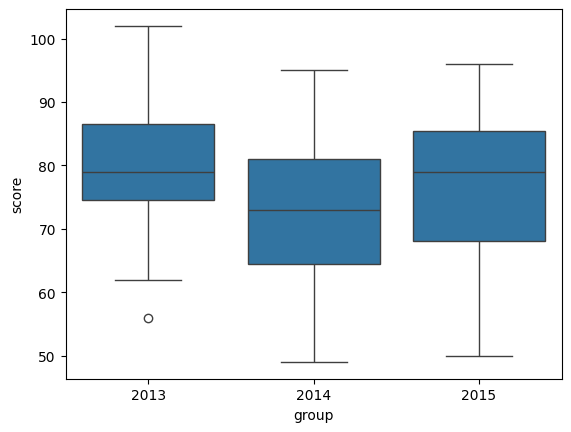

In [15]:

ax = sns.boxplot(x = 'group', y = 'score', data=df1)
plt.show()


In [22]:

fvalue, pvalue = stats.f_oneway(Energia_2013, Energia_2014, Energia_2015)
print('Statystyka f: stat=%.3f, wartość: p=%3f' %(fvalue, pvalue))

Statystyka f: stat=5.102, wartość: p=0.007186


In [17]:

model = ols('score ~ C(group)', data=df1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(group),1216.993464,2.0,5.101694,0.007186
Residual,17891.019608,150.0,NaN,NaN


Since the null hypothesis for Tukey's test states that all means being compared are from the same population (i.e. μ1 = μ2 = μ3 = ... = μk)

In [23]:
tukey = pairwise_tukeyhsd(endog=df1['score'],  groups=df1['group'], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
  2013   2014  -6.8627 0.0052 -11.9824 -1.7431   True
  2013   2015  -2.7451 0.4148  -7.8647  2.3745  False
  2014   2015   4.1176 0.1411   -1.002  9.2373  False
-----------------------------------------------------


# **Regresja**

Wykonując analizę wariancji (ANOVA) możemy wykorzystać model regresji do wyznaczenia tabeli ANOVA

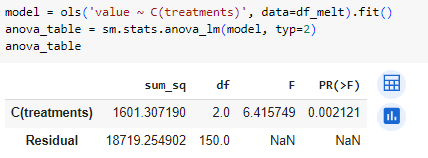

In [19]:
df_melt.head()

,index,treatments,value
0,0,2015,68
1,1,2015,71
2,2,2015,82
3,3,2015,68
4,4,2015,74


In [20]:
model = ols('value ~ C(treatments)', data=df_melt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     5.102
Date:                Tue, 10 Oct 2023   Prob (F-statistic):            0.00719
Time:                        11:59:13   Log-Likelihood:                -581.36
No. Observations:                 153   AIC:                             1169.
Df Residuals:                     150   BIC:                             1178.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                79.8235      1.529     52.197      0.000      76.802      82.845
C(treatments)[T.2014]    -6.8627      2.163     -3.173      0.002     -11.136      -2.589
C(treatments)[T.2015]    -2.7451      2.163     -1.269      0.206      -7.018       1.528
==============================================================================
Omnibus:                        2.240   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.326   Jarque-Bera (JB):                1.880
Skew:                          -0.140   Prob(JB):                        0.391
Kurtosis:                       2.535   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Proszę porównać wartość statystyki F oraz wartość p dla F w obu przypadkach.**


**ODP:**

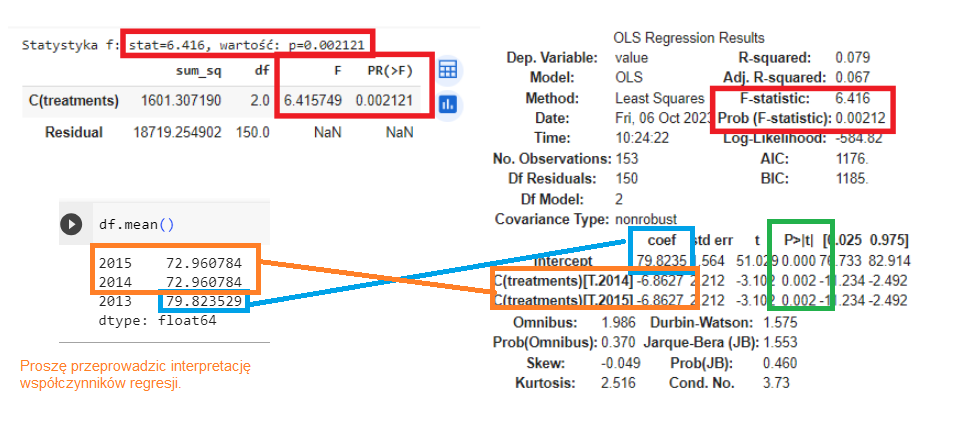

In [21]:
df.mean()

2015    77.078431
2014    72.960784
2013    79.823529
dtype: float64

In [25]:
from statsmodels.stats.power import FTestAnovaPower

In [26]:
eta_kw = anova_table['sum_sq'][0]/(anova_table['sum_sq'][0]+anova_table['sum_sq'][1])
print('efekt: ', eta_kw)

power = FTestAnovaPower().power(effect_size = eta_kw, nobs = 6000, alpha=0.05, k_groups=6)
print('moc testu: ', power)

efekt:  0.06369021517168064
moc testu:  0.9821501489372972


C:\Users\j.mazur\AppData\Local\Temp\ipykernel_14684\1179629773.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_kw = anova_table['sum_sq'][0]/(anova_table['sum_sq'][0]+anova_table['sum_sq'][1])
